In [1]:
import pandas as pd

In [2]:
import pandas as pd
import re
import os

import mysql.connector
db = mysql.connector.connect(user='root', password='password', database='folklore_db2')
cur = db.cursor()

In [3]:
! mdb-tables /home/dkbrz/Downloads/Sebezh.mdb 
! mdb-export /home/dkbrz/Downloads/Sebezh.mdb tblCards -d "\t" > tblCards.csv
! mdb-export /home/dkbrz/Downloads/Sebezh.mdb tblInformators -d "\t" > tblInformators.csv
! mdb-export /home/dkbrz/Downloads/Sebezh.mdb tblKeyWords -d "\t" > tblKeyWords.csv
! mdb-export /home/dkbrz/Downloads/Sebezh.mdb tblSobirately -d "\t" > tblSobirately.csv
! mdb-export /home/dkbrz/Downloads/Sebezh.mdb tblTerminy -d "\t" > tblTerminy.csv

tblCards tblInformators tblKeyWords tblSobirately tblTerminy Ошибки вставки 


In [108]:
cards = pd.read_csv('tblCards.csv', sep='\t')
informators = pd.read_csv('tblInformators.csv', sep='\t')
sobirately = pd.read_csv('tblSobirately.csv', sep='\t')

In [4]:
cards.head(2)

,текст,аннотация,ключевые слова,термины,программа,вопрос,село,год,информант,информант2,...,информант4,собиратель,собиратель2,собиратель3,собиратель4,номер,zvuk,zvuk2,photo,photo2
0,"[Не говорили, что в женские дни лучше сажать?]...",NaN,"Время, Дни, Мужской-женский, Растения, Овощи, ...",NaN,XIV,8 а,"Псковская обл., Себеж",2019,А-1,NaN,...,NaN,ТМА,ОЕС,NaN,NaN,4,NaN,NaN,NaN,NaN
1,"[Не слышали, что жениха с невестой надо на шуб...",NaN,"Невеста, Жених, Выкуп, Плата, Свадебный обряд,...",NaN,Ia,"8 в, 14 г","Псковская обл., Себеж",2019,АТО,NaN,...,NaN,САИ,ТМА,NaN,NaN,56,NaN,NaN,NaN,NaN


### Сохранить геолокации

In [63]:
cards['село'] = [i if i != "Дворищи" else "Дворище" for i in cards['село'].values]

In [64]:
cards['село'].value_counts()

Себеж              1222
Глембочино           79
Чернея               60
Бондари              51
Эпимахово            50
Дворище              23
Букатино             19
Комары               18
Белогурово            6
Глубочица             4
Себеж-Эпимахово       2
Name: село, dtype: int64

In [65]:
cur.execute('SELECT * FROM g_villages WHERE id > 30')
villages = {key: value for value, key in cur.fetchall()}

In [66]:
villages

{'Себеж': 31,
 'Глембочино': 32,
 'Чернея': 33,
 'Бондари': 34,
 'Эпимахово': 35,
 'Букатино': 36,
 'Комары': 38,
 'Дворище': 39,
 'Белогурово': 40,
 'Глубочица': 41,
 'Себеж-Эпимахово': 42}

### Сохранить информантов

In [55]:
INFORMATOR_MIN_INDEX = 10335
informators = informators[informators['порядковый номер информанта']>=10335]

In [56]:
informators['село'] = [i if i != "Дворищи" else "Дворище" for i in informators['село'].values]

In [57]:
cur.execute('SELECT max(id) FROM informators')
cur.fetchall()

[(423,)]

In [58]:
informators['село'].value_counts()

Себеж         91
Эпимахово      8
Чернея         6
Глембочино     5
Бондари        4
Дворище        2
Букатино       1
Белогурово     1
Комары         1
Глубочица      1
Name: село, dtype: int64

In [59]:
informators

,инициалы,ФИО,село,биография,порядковый номер информанта
0,СНЛ,Сафронова Надежда Лукинична,Себеж,"1935 г.р., род. и живет в г. Себеж. Работала н...",10378
1,СВИ,Страхова Валентина Ивановна,Себеж,"1936 г.р., род. в д. Зуевка Себежского р-на. Ж...",10379
2,ВА,Владимир Александрович,Себеж,"1955 г.р., с 1978 г. живет в г. Себеж, до этог...",10380
3,ЦИВ,Цветкова Ирина Васильевна,Себеж,"1960 г.р., род. в пос. Кунья Псковской обл., ж...",10381
4,ТСВ,Терешкова Светлана Васильевна,Себеж,"1977 г.р., род. и живет в г. Себеж. Работает в...",10382
...,...,...,...,...,...
115,ИНП,Испавская Нина Петровна,Себеж,"1936 г.р., род. в д. Кобылинцы Верхнедвинского...",10451
116,АНТ,Андреевна Нина Тимофеевна,Себеж,"1936 г.р., род. в д. Литвиново (Себежского р-н...",10452
117,ГВП,Горская Валентина Петровна,Себеж,"1944 г.р., род. на Кубани, жила в д. Томсино (...",10453
118,КТП,Кадовская Татьяна Павловна,Себеж,"1933 г.р., род. в Мордовии, жила в Якутии: в Я...",10454


In [76]:
cur.executemany("""
INSERT INTO informators
(code, name, current_village, bio, old_id)
VALUES 
(%s, %s, %s, %s, %s)
""", informators.values.tolist())

In [77]:
db.commit()

In [60]:
cur.execute('SELECT id, code FROM informators WHERE id > 303')
informators = {key: value for value, key in cur.fetchall()}

### Проверить ключевые слова

In [6]:
print(cards[cards['номер'] == 1352]['текст'].values[0])

[После рассказа о предзнаменовании войны (см. XXIa-17) СЮ напоминает СВИ, что она когда-то рассказывала ему про Параскеву Пятницу. СВИ рассказывает.] У нас води\тель, получа\ется, прихо\дит [СВИ работала бухгалтером на автобазе в Фергане, дело происходило там] и говори\т. Сдаё\т командиро\вочное, я принима\ю. Он смо\трит на меня\ и говори\т: «Валенти\на Ива\нна!» Я говорю\: «Да». – «А когда\ вы стира\ете?» А я так ду\маю: мущи\на и спра\шивает. Заче\м это? Я та\к посмотре\ла и говорю\: «А ва\ша жена\ когда стира\ет?» А он гът: «А вот щас я вам расскажу\». А я всегда\ стира… стира\ла… ка\к вам сказа\ть: в четве\рг зама\чиваю, пя\тницу вы\стираю, пове\шу, и у меня суббо\та-воскресе\нье выходно\й. А я говорю… а он говори\т: «А вы зна\ете, како\е чу\до?» А он опа\сный груз – тру\бы вози\л таки\е, больши\е, и сза\ди виси\т така\я кра\сная тря\пка, что опа\сный гру\з. Вот е\дет он с Кока\нда до Ферганы\ – э\то пися\т киломе\тров – стои\т же\нщина на доро\ге, подня\ла ру\ку. Он гът, я посмотр

In [7]:
cur.execute('SELECT id, word FROM keywords')
keywords = {key: value for value, key in cur.fetchall()}

In [11]:
key_fix = {
    "Хозяин-хозяйка-хозяйка": ["Хозяин-хозяйка"],
    "Жених. Невеста": ["Жених", "Невеста"],
     'Конец cвета': ["Конец света"],
     'Мужской-женской': ["Мужской-женский"],
     'Первый. Последний': ["Первый", "Последний"],
     'Покров (календ.) (календ.)': ["Покров (календ.)"],
     'Рожа (болезнь)Гадания': ["Рожа (болезнь)", "Гадания"],
     'Рожа(болезнь)': ["Рожа (болезнь)"],
     'УРодство': ["Уродство"],
     'Хозяин-хозяйка-хозяйка': [],
     'Шитье': ["Шить"],
     'ЮРодство': ["Юродство"]
}

In [14]:
for idx, keyworditem in cards[['номер', 'ключевые слова']].values:
    kwds = [i.strip() for i in keyworditem.split(',')]
    good = []
    for k in kwds:
        if k not in keywords:
            if k in key_fix:
                good.append(key_fix[k])
            else:
                print(idx, k, sep='\t')
        else:
            good.append(k)

470	
1826	
1376	
964	
971	


In [10]:
bugs

{'',
 'Жених. Невеста',
 'Конец cвета',
 'Мужской-женской',
 'Первый. Последний',
 'Покров (календ.) (календ.)',
 'Рожа (болезнь)Гадания',
 'Рожа(болезнь)',
 'УРодство',
 'Хозяин-хозяйка-хозяйка',
 'Шитье',
 'ЮРодство'}

### Сохранить тексты

In [24]:
cards['год'].value_counts()

2019    1534
Name: год, dtype: int64

In [27]:
data = []
for i in range(len(cards)):
    row = cards.iloc[i]
    data.append((row["текст"], 2019, int(row["номер"])))

In [28]:
cur.executemany("INSERT INTO texts (raw_text, year, old_id) VALUES (%s, %s, %s)", data)
db.commit()

In [29]:
cur.execute("UPDATE texts SET leader = 'АБМ' WHERE id > 5379")
db.commit()

In [30]:
cards.head()

,текст,аннотация,ключевые слова,термины,программа,вопрос,село,год,информант,информант2,...,информант4,собиратель,собиратель2,собиратель3,собиратель4,номер,zvuk,zvuk2,photo,photo2
0,"[Не говорили, что в женские дни лучше сажать?]...",NaN,"Время, Дни, Мужской-женский, Растения, Овощи, ...",NaN,XIV,8 а,"Псковская обл., Себеж",2019,А-1,NaN,...,NaN,ТМА,ОЕС,NaN,NaN,4,NaN,NaN,NaN,NaN
1,"[Не слышали, что жениха с невестой надо на шуб...",NaN,"Невеста, Жених, Выкуп, Плата, Свадебный обряд,...",NaN,Ia,"8 в, 14 г","Псковская обл., Себеж",2019,АТО,NaN,...,NaN,САИ,ТМА,NaN,NaN,56,NaN,NaN,NaN,NaN
2,[Ранее собиратели спрашивали ЦИВ про приметы. ...,NaN,"Мужской-женский, Приметы, Гость, Знак-знамение...",NaN,XII,"3 в, 18","Псковская обл., Себеж",2019,ЦИВ,NaN,...,NaN,КЕА,САИ,NaN,NaN,296,NaN,NaN,NaN,NaN
3,"[Расскажите про источник, пожалуйста] Ну, здес...",NaN,"Источник, Святыни, Крест, Народное православие...",NaN,XXIIa,19,"Псковская обл., Себеж",2019,НТВ,NaN,...,NaN,КАС,СЭС,NaN,NaN,630,NaN,NaN,NaN,NaN
4,"Вообще\, Угори\нка, вот э\та Угори\нка, тут ра...",NaN,"Предания, Предания топоним., Река, Вода, Озеро...",NaN,XXIa,"12 д, доп.","Псковская обл., Себеж",2019,НТВ,NaN,...,NaN,КАС,СЭС,NaN,NaN,631,NaN,NaN,NaN,NaN


In [6]:
cur.execute("SELECT old_id, id FROM texts WHERE id > 5379")
texts = {x: y for x, y in cur.fetchall()}

### Сохранить ключевые слова

In [39]:
good = []
for idx, keyworditem in cards[['номер', 'ключевые слова']].values:
    kwds = [i.strip() for i in keyworditem.split(',')]
    for k in kwds:
        if k not in keywords:
            if k in key_fix:
                for w in key_fix[k]:
                    good.append((texts[str(idx)], keywords[w],))
            else:
                print(idx, k, sep='\t')
        else:
            good.append((texts[str(idx)], keywords[k],))

470	
1826	
1376	
964	
971	


In [41]:
cur.executemany("INSERT INTO t_k (id_text, id_keyword) VALUES (%s, %s)", good)
db.commit()

### Сохранить информантов по текстам

In [109]:
cur.execute('SELECT id, code FROM informators WHERE id > 303')
informators = {key.strip(): value for value, key in cur.fetchall()}

In [83]:
data = []
for i in range(len(cards)):
    row = cards.iloc[i]
    text_id = row['номер']
    for v in row[['информант','информант2', 'информант3', 'информант4']].dropna().values:
        if v.strip() not in informators and v != '???':
            print(row['номер'], v)
        if v.strip() in informators:
            data.append((int(text_id), informators[v.strip()]))

1168 ПВА
299 ЧВФ
276 ЧВФ
279 ЧВФ
1449 ЮС
547 ГРВ


In [84]:
cur.executemany("INSERT INTO t_i (id_text, id_informator) VALUES (%s, %s)", data)
db.commit()

### Сохранить гео по текстам

In [92]:
data = []
for i in range(31, 42):
    if i != 37:
        data.append((5, 5, i))

In [93]:
data

[(5, 5, 31),
 (5, 5, 32),
 (5, 5, 33),
 (5, 5, 34),
 (5, 5, 35),
 (5, 5, 36),
 (5, 5, 38),
 (5, 5, 39),
 (5, 5, 40),
 (5, 5, 41)]

In [94]:
cur.executemany("INSERT INTO g_geo_text (id_region, id_district, id_village) VALUES (%s, %s, %s)", data)
db.commit()

In [96]:
cur.execute('SELECT g_geo_text.id, g_villages.village_name FROM g_geo_text JOIN g_villages ON g_geo_text.id_village = g_villages.id WHERE g_villages.id > 30;')
geo = {key: value for value, key in cur.fetchall()}

In [97]:
geo

{'Себеж': 63,
 'Глембочино': 64,
 'Чернея': 65,
 'Бондари': 66,
 'Эпимахово': 67,
 'Букатино': 68,
 'Комары': 69,
 'Дворище': 70,
 'Белогурово': 71,
 'Глубочица': 72}

In [107]:
data = []
for i in range(len(cards)):
    row = cards.iloc[i]
    text_id = row['номер']
    g = row['село'].split(',')[-1].strip()
    if g in geo:
        data.append((geo[g], texts[str(text_id)]))
    else:
        print(g)

In [109]:
cur.executemany("UPDATE texts SET geo_id = %s WHERE id = %s", data)
db.commit()

### Сохранить вопросы по текстам

In [70]:
cur.execute("SELECT id, question_list, question_num, question_letter FROM folklore_db2.questions;")
known_questions = {(i[1], i[2], i[3]): i[0] for i in cur.fetchall()}

In [71]:
def normalize(name):
    name = name.replace("а", "a")
    name = name.replace("Х", "X")
    return name

def restore_label(label):
    label = label.replace("a", 'а').replace("e", 'е')
    label = label.split(',')
    result = []
    for i in label:
        q = re.findall('^([0-9]*)[^0-9a-zа-я]*?([ a-zа-я\.]*?)$', i.strip())[0]
        result.append((q[0].strip(), q[1].strip()))
    for key, value in enumerate(result):
        if value[0] == '':
            result[key] = (result[key-1][0].strip(), value[1].strip())
    return ['-'.join(i).strip(". ") for i in result]

In [72]:
cards.columns

Index(['текст', 'аннотация', 'ключевые слова', 'термины', 'программа',
       'вопрос', 'село', 'год', 'информант', 'информант2', 'информант3',
       'информант4', 'собиратель', 'собиратель2', 'собиратель3', 'собиратель4',
       'номер', 'zvuk', 'zvuk2', 'photo', 'photo2'],
      dtype='object')

In [54]:
questions = cards[['номер', 'программа', 'вопрос']].copy()
questions["вопрос"] = questions["вопрос"].apply(restore_label).tolist()
questions["программа"] = questions["программа"].apply(normalize).tolist()

In [57]:
"Ia" == 'Ia'

True

In [65]:
add = set()
for idx, prog, quests in questions.values:
    for q in quests:
        if q.split('-')[0] == "": num = 0
        else: num = int(q.split('-')[0])
        let = q.split('-')[1]
        key = (prog, num, let)
        if key not in known_questions:
            add.add(key)

In [69]:
cur.executemany("INSERT INTO questions (question_list, question_num, question_letter) VALUES (%s, %s, %s)", list(add))
db.commit()

In [75]:
data = []
for idx, prog, quests in questions.values:
    for q in quests:
        if q.split('-')[0] == "": num = 0
        else: num = int(q.split('-')[0])
        let = q.split('-')[1]
        key = (prog, num, let)
        data.append([texts[str(idx)], known_questions[key]])

In [77]:
cur.executemany("INSERT INTO t_q (id_text, id_question) VALUES (%s, %s)", data)
db.commit()

In [78]:
# for i in sorted(cards[''].apply(normalize).value_counts().index):
#     print(i)

In [79]:
# for i in sorted(cards['программа'].apply(normalize).value_counts().index):
#     print(i)

### Сохранить информантов

In [82]:
informators['село'].value_counts()

Себеж                       91
Рогов                       69
Спиридонова Буда            66
Малые Щербиничи             33
Карпиловка                  20
Большие Щербиничи           15
Азаричи                     12
Шурубовка                   11
Еловка                       8
Эпимахово                    8
Новобежков                   7
Чернея                       6
Софиевка                     5
Глембочино                   5
Бондари                      4
Кривуша (= Зелёная Роща)     2
Дворищи                      2
Белогурово                   1
Комары                       1
Мадые Щербиничи              1
Букатино                     1
Глубочица                    1
Name: село, dtype: int64

In [83]:
informators = informators.sort_values(by='порядковый номер информанта', ascending=False)
informators

,инициалы,ФИО,село,биография,порядковый номер информанта
118,КТП,Кадовская Татьяна Павловна,Себеж,"1933 г.р., род. в Мордовии, жила в Якутии: в Я...",10454
117,ГВП,Горская Валентина Петровна,Себеж,"1944 г.р., род. на Кубани, жила в д. Томсино (...",10453
116,АНТ,Андреевна Нина Тимофеевна,Себеж,"1936 г.р., род. в д. Литвиново (Себежского р-н...",10452
115,ИНП,Испавская Нина Петровна,Себеж,"1936 г.р., род. в д. Кобылинцы Верхнедвинского...",10451
114,ТА,Тарасов Алексей,Чернея,"1986 г.р., род. в д. Глембочино, живет в д. Че...",10450
...,...,...,...,...,...
149,РНП,Рожкова Наталья Петровна,Рогов,"Примерно 1960 г.р., род. в Почепском р-не. В 1...",9842
148,ЦНМ,Цупиков Николай Матвеевич,Рогов,"Примерно 1950 г.р., род. в с. Рогов. Жил в Лен...",9841
147,ЦНИ,Цупикова Нина Ивановна,Рогов,"1956 г.р., род. в с. Рогов. Училась на повара....",9840
146,М,Мария,Рогов,"Примерно 1985 г.р., дочь ЛО",9839


In [84]:
informators['село'].value_counts()

Себеж                       91
Рогов                       69
Спиридонова Буда            66
Малые Щербиничи             33
Карпиловка                  20
Большие Щербиничи           15
Азаричи                     12
Шурубовка                   11
Еловка                       8
Эпимахово                    8
Новобежков                   7
Чернея                       6
Софиевка                     5
Глембочино                   5
Бондари                      4
Кривуша (= Зелёная Роща)     2
Дворищи                      2
Белогурово                   1
Комары                       1
Мадые Щербиничи              1
Букатино                     1
Глубочица                    1
Name: село, dtype: int64

In [85]:
informators.groupby('инициалы').agg({'ФИО': 'count'}).sort_values('ФИО', ascending=False)

,ФИО
инициалы,
В,3
А,3
ЛП,3
ВА,3
КАИ,2
...,...
КВП,1
КАП,1
КАН,1


In [87]:
# cards['село'].value_counts()

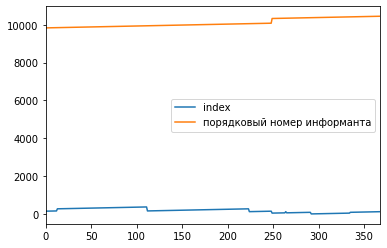

In [88]:
informators['порядковый номер информанта'].sort_values().reset_index().plot();

In [94]:
informators[informators['инициалы'] == 'ПАВ']

,инициалы,ФИО,село,биография,порядковый номер информанта
85,ПАВ,Прокофьева Анна Васильевна,Бондари,"1929 г.р., род и живет в д. Бондари. 29 лет ра...",10421


In [117]:
values = []
for i in ['информант', 'информант2', 'информант3', 'информант4']:
    values.extend(cards[['номер', i]].dropna().values.tolist())

In [114]:
changed = {
    "ЮС": "ЮГС",
    "ГРВ": "ГВР",
    "ЧВФ": "ЧФВ",
    "ПВА": "ПАВ",
}

In [122]:
data = []
for j, i in values:
    if i is not None and "?" not in i:
        n = i.strip()
        if n in changed:
            n = changed[n]
        data.append((texts[str(j)], informators[n]))

In [124]:
cur.executemany("INSERT INTO t_i (id_text, id_informator) VALUES (%s, %s)", data)
db.commit()

#### Информация

In [138]:
from pymystem3 import Mystem
m = Mystem()
m._mystemargs.append('--eng-gr')

In [139]:
def g_name(name):
    global m
    res = m.analyze(name)
    fem, mal = 0, 0
    if len(res) == 6:
        res = res[2:]
    for i in res:
        if 'analysis' in i:
            try:
                if ',f,' in i['analysis'][0]['gr']:
                    fem += 1
                elif ',m,' in i['analysis'][0]['gr']:
                    mal += 1
            except:
                pass
    if fem > 0 and mal == 0:
        return 'f'
    elif fem == 0 and mal > 0:
        return 'm'
    else:
        return None

In [143]:
cur.execute("SELECT id, name, bio FROM informators WHERE id > 304;")
data = cur.fetchall()

In [144]:
gender = []
for i, n, b in data:
    gender.append((g_name(n), i))

In [145]:
cur.executemany("UPDATE informators SET gender = %s WHERE id = %s", gender)
db.commit()

In [154]:
def birthyear(text):
    yrs = re.findall("[0-9]{4}", text)
#     print(yrs)
    if len(yrs) > 0:
        yr = min(int(i) for i in yrs)
        return yr

In [155]:
yrs = []
for i, n, b in data:
    yrs.append((birthyear(b), i))

In [157]:
cur.executemany("UPDATE informators SET birth_year = %s WHERE id = %s", yrs)
db.commit()